In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv("../ArchGarchDatasets/RelianceIndustries.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-02,2353.649170,2380.416260,2351.987793,2377.554932,2369.185791,2658087
1,2023-01-03,2367.540283,2374.878174,2351.618652,2360.156250,2351.848389,3829466
2,2023-01-04,2360.110107,2363.848389,2320.421143,2324.620850,2316.438232,4632445
3,2023-01-05,2329.189697,2341.096436,2311.191162,2320.467285,2312.299316,6818549
4,2023-01-06,2332.097168,2351.757080,2324.390137,2341.557861,2333.315430,3174798
...,...,...,...,...,...,...,...
260,2024-01-23,2743.500000,2743.500000,2645.100098,2657.149902,2657.149902,10027710
261,2024-01-24,2670.449951,2699.000000,2647.850098,2687.750000,2687.750000,10959564
262,2024-01-25,2685.899902,2728.300049,2670.399902,2706.149902,2706.149902,5904436
263,2024-01-29,2729.000000,2905.000000,2720.350098,2896.100098,2896.100098,11946719


In [2]:
print(df.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


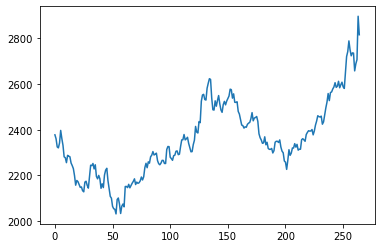

In [3]:
plt.plot(df['Close'])


In [4]:
returns =df['Close'].pct_change().dropna()

df['Daily_Returns'] = df['Close'].pct_change()
df


,Date,Open,High,Low,Close,Adj Close,Volume,Daily_Returns
0,2023-01-02,2353.649170,2380.416260,2351.987793,2377.554932,2369.185791,2658087,NaN
1,2023-01-03,2367.540283,2374.878174,2351.618652,2360.156250,2351.848389,3829466,-0.007318
2,2023-01-04,2360.110107,2363.848389,2320.421143,2324.620850,2316.438232,4632445,-0.015056
3,2023-01-05,2329.189697,2341.096436,2311.191162,2320.467285,2312.299316,6818549,-0.001787
4,2023-01-06,2332.097168,2351.757080,2324.390137,2341.557861,2333.315430,3174798,0.009089
...,...,...,...,...,...,...,...,...
260,2024-01-23,2743.500000,2743.500000,2645.100098,2657.149902,2657.149902,10027710,-0.028429
261,2024-01-24,2670.449951,2699.000000,2647.850098,2687.750000,2687.750000,10959564,0.011516
262,2024-01-25,2685.899902,2728.300049,2670.399902,2706.149902,2706.149902,5904436,0.006846
263,2024-01-29,2729.000000,2905.000000,2720.350098,2896.100098,2896.100098,11946719,0.070192


# Actual volatality computation

In [6]:
import pandas as pd

# Assuming 'df' is your DataFrame with a column 'returns'
returns = df['Daily_Returns']

# Calculate the squared returns
squared_returns = returns ** 2

# Calculate the actual volatility (e.g., the rolling standard deviation of squared returns)
actual_volatility = squared_returns.rolling(window=20).mean().apply(lambda x: (x * 252) ** 0.5)

# Alternatively, you can use pandas' rolling standard deviation directly
# actual_volatility = returns.rolling(window=window_size).std()

# Drop NaN values resulting from the rolling calculation
actual_volatility = actual_volatility.dropna()

# Print or use the calculated actual volatility
print(actual_volatility)


20     0.191720
21     0.191113
22     0.184537
23     0.184455
24     0.183570
         ...   
260    0.205324
261    0.208579
262    0.209640
263    0.324607
264    0.338234
Name: Daily_Returns, Length: 245, dtype: float64


In [7]:
print(df.isnull().sum())

Date             0
Open             0
High             0
Low              0
Close            0
Adj Close        0
Volume           0
Daily_Returns    1
dtype: int64


In [8]:
df.dropna(inplace=True)
returns.dropna(inplace=True)
df
returns


1     -0.007318
2     -0.015056
3     -0.001787
4      0.009089
5      0.023611
         ...   
260   -0.028429
261    0.011516
262    0.006846
263    0.070192
264   -0.027917
Name: Daily_Returns, Length: 264, dtype: float64

In [9]:
pip install arch

Note: you may need to restart the kernel to use updated packages.


In [10]:
from arch import arch_model


In [11]:
garch_model = arch_model(df['Daily_Returns'], vol='GARCH', p=1, q=1)
garch_results = garch_model.fit()

print(garch_results)



D:\Programs\anaconda3\Anaconda\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001452. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:      6,   Neg. LLF: 152706044504.90222
Iteration:      2,   Func. Count:     18,   Neg. LLF: 339162608.8092176
Optimization terminated successfully    (Exit mode 0)
            Current function value: -798.6483135274151
            Iterations: 2
            Function evaluations: 27
            Gradient evaluations: 2
                     Constant Mean - GARCH Model Results                      
Dep. Variable:          Daily_Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                798.648
Distribution:                  Normal   AIC:                          -1589.30
Method:            Maximum Likelihood   BIC:                          -1574.99
                                        No. Observations:                  264
Date:                Sat, Mar 02 2024   Df Residuals:                      263
Time:          

In [12]:
forecast = garch_results.forecast(horizon=1)




In [13]:
print("GARCH(1,1) Model Parameters:")
print(garch_results.params)

print("\nForecasted Conditional Variance for the next 1 day:")
print(forecast.variance.iloc[-1])

GARCH(1,1) Model Parameters:
mu          0.000907
omega       0.000015
alpha[1]    0.100000
beta[1]     0.800000
Name: params, dtype: float64

Forecasted Conditional Variance for the next 1 day:
h.1    0.000605
Name: 264, dtype: float64


In [14]:
best_aic = np.inf  # Initialize with a very large value
best_order = None

# Loop over potential values of p and q
for p in range(1, 6):  # Maximum lag order for ARCH model
    for q in range(1, 6):  # Maximum lag order for GARCH model
        # Fit ARCH/GARCH model with current p and q values
        model = arch_model(returns, vol='Garch', p=p, q=q)
        result = model.fit(disp='off')  # Suppress output for simplicity
        
        # Calculate AIC
        aic = result.aic
        
        # Check if current AIC is the best so far
        if aic < best_aic:
            best_aic = aic
            best_order = (p, q)
            p_value=p
            q_value=q

print("Best AIC:", best_aic)
print("Best Order (p, q):", best_order)


D:\Programs\anaconda3\Anaconda\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001452. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
D:\Programs\anaconda3\Anaconda\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001452. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
D:\Programs\anaconda3\Anaconda\lib\site-packages\arch\univariate

Best AIC: -1592.7160203986155
Best Order (p, q): (2, 1)


D:\Programs\anaconda3\Anaconda\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001452. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
D:\Programs\anaconda3\Anaconda\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001452. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
D:\Programs\anaconda3\Anaconda\lib\site-packages\arch\univariate

In [15]:
import arch
from arch import arch_model
model = arch_model(returns, vol='Garch', p=2, q=1)
results = model.fit(disp='off')
print(results)


                     Constant Mean - GARCH Model Results                      
Dep. Variable:          Daily_Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                801.358
Distribution:                  Normal   AIC:                          -1592.72
Method:            Maximum Likelihood   BIC:                          -1574.84
                                        No. Observations:                  264
Date:                Sat, Mar 02 2024   Df Residuals:                      263
Time:                        13:51:08   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         1.0670e-03  7.564e-04      1.411      0.158 

D:\Programs\anaconda3\Anaconda\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001452. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [23]:
forecast = result.forecast(horizon=1)
forecast_volatility = np.sqrt(forecast.variance.iloc[-1])
print(forecast_volatility);

h.1    0.020621
Name: 264, dtype: float64


In [37]:
print(forecast_volatility)


h.1    0.020621
Name: 264, dtype: float64


# Residual computation

In [21]:
# Get the residuals
residuals = results.resid

# Display the first few residuals
print(residuals.head())

1   -0.008385
2   -0.016123
3   -0.002854
4    0.008022
5    0.022544
Name: resid, dtype: float64


In [31]:
residuals.count

<bound method Series.count of 1     -0.008385
2     -0.016123
3     -0.002854
4      0.008022
5      0.022544
         ...   
260   -0.029496
261    0.010449
262    0.005779
263    0.069125
264   -0.028984
Name: resid, Length: 264, dtype: float64>

In [32]:
residuals.sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 1     -0.008385
2     -0.016123
3     -0.002854
4      0.008022
5      0.022544
         ...   
260   -0.029496
261    0.010449
262    0.005779
263    0.069125
264   -0.028984
Name: resid, Length: 264, dtype: float64>

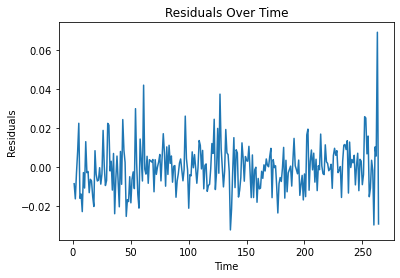

In [22]:
import matplotlib.pyplot as plt

# Plot the residuals over time
plt.plot(residuals)
plt.title('Residuals Over Time')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()

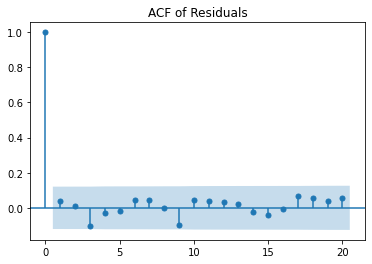

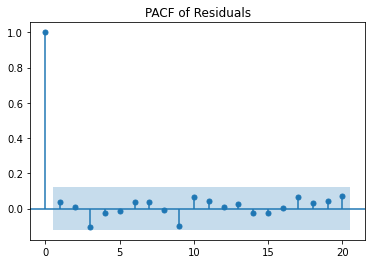

In [23]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot the autocorrelation function (ACF) of residuals
plot_acf(residuals, lags=20)
plt.title('ACF of Residuals')
plt.show()

# Plot the partial autocorrelation function (PACF) of residuals
plot_pacf(residuals, lags=20)
plt.title('PACF of Residuals')
plt.show()


In [24]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Ljung-Box test for autocorrelation in residuals
lb_test, p_values = acorr_ljungbox(residuals, lags=20)
print(f"Ljung-Box test statistic: {lb_test}")
print(f"P-values: {p_values}")


Ljung-Box test statistic: [ 0.39370058  0.41491083  3.1719023   3.43857883  3.51717937  4.0277783
  4.59422306  4.59502682  7.29912076  7.88821607  8.30430578  8.59985188
  8.74382597  8.89350747  9.32607653  9.35025316 10.74636366 11.63019556
 12.06826035 12.92869452]
P-values: [0.53036061 0.81264947 0.36587303 0.48727881 0.62078978 0.67291709
 0.70934353 0.7998524  0.60600747 0.63975494 0.68581303 0.73667481
 0.79200422 0.83781137 0.85986011 0.89829145 0.86944126 0.86573019
 0.8826869  0.88042243]


D:\Programs\anaconda3\Anaconda\lib\site-packages\statsmodels\stats\diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


In [25]:
mean_residual = residuals.mean()
std_residual = residuals.std()

print(f"Mean of Residuals: {mean_residual}")
print(f"Standard Deviation of Residuals: {std_residual}")


Mean of Residuals: -0.00035465717677310167
Standard Deviation of Residuals: 0.012072912239737768


In [29]:
from scipy.stats import zscore

# Detect outliers using z-score
z_scores = zscore(residuals)
outliers = (z_scores > 3) | (z_scores < -3)

print(f"Number of outliers: {sum(outliers)}")

Number of outliers: 3


# Errors computation

In [29]:
average_volatility = actual_volatility.mean()
print(average_volatility)

0.1704793121139145


In [38]:
from sklearn.metrics import mean_squared_error

# Assuming 'actual_volatility' is the actual conditional volatility and 'predicted_volatility' is the predicted volatility
mse = mean_squared_error(actual_volatility, forecast_volatility)

print(mse)

ValueError: Found input variables with inconsistent numbers of samples: [245, 1]